# Bathymetry plot

In [1]:
import numpy as np
import file_io as io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cmocean.cm as cmo
import cmocean

In [2]:
#longitude and latitude range
lon_min = -65
lon_max =  40
lat_min = -80
lat_max = -45
lon_range = (lon_min, lon_max)
lat_range = (lat_min, lat_max)

# save figures?
saveFig = True

# plot location
ploc = 'plots/plots_WeddellClassOnly_top1000m_K04_forPaperRevisions/'

In [3]:
# load data
bds = io.load_bathymetry("bathy.nc")
bathy_lon = bds['lon'][:]
bathy_lat = bds['lat'][:]
bathy = bds['bathy'][:]

file_io.load_bathymetry


In [4]:
# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


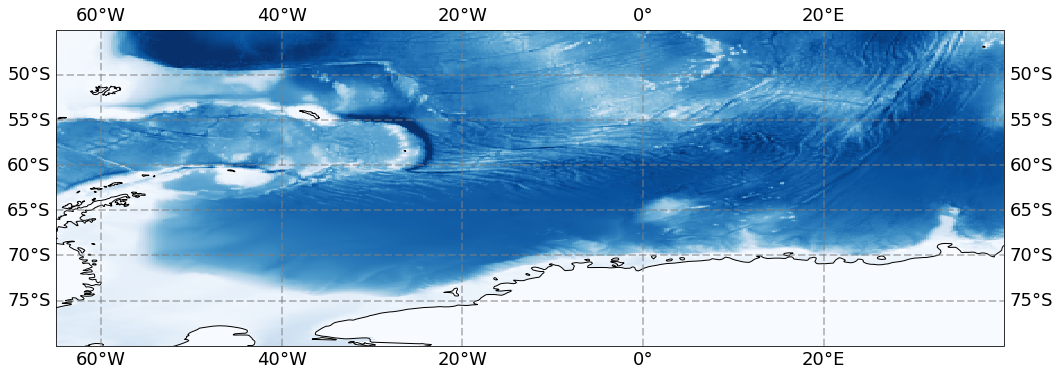

In [5]:
vmin = -6000.0
vmax = 0.0

# cartopy plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                ccrs.PlateCarree())
# colormesh histogram
CS = plt.pcolormesh(bathy_lon, bathy_lat, bathy, transform=ccrs.PlateCarree(), cmap="Blues_r")
plt.clim(vmin, vmax)
ax.coastlines(resolution='50m',color='white')
# format ticklines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])
gl.ylocator = mticker.FixedLocator([-75, -70, -65, -60, -55, -50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
# add land and coastlines
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='50m')

if saveFig==True:
    plt.savefig('bathymetry.png', bbox_inches='tight')
    plt.savefig('bathymetry.pdf', bbox_inches='tight')
    
plt.show()
plt.close()

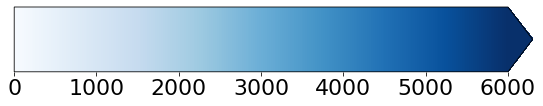

In [6]:
# separate colorbar
a = np.array([[np.abs(vmin), np.abs(vmax)]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="Blues")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax, extend="max")
cbar.ax.tick_params(labelsize=22)

if saveFig==True:
    plt.savefig(ploc + 'bathymetry_colormap.png', bbox_inches='tight')
    plt.savefig(ploc + 'bathymetry_colormap.pdf', bbox_inches='tight')
    
plt.show()
plt.close()

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


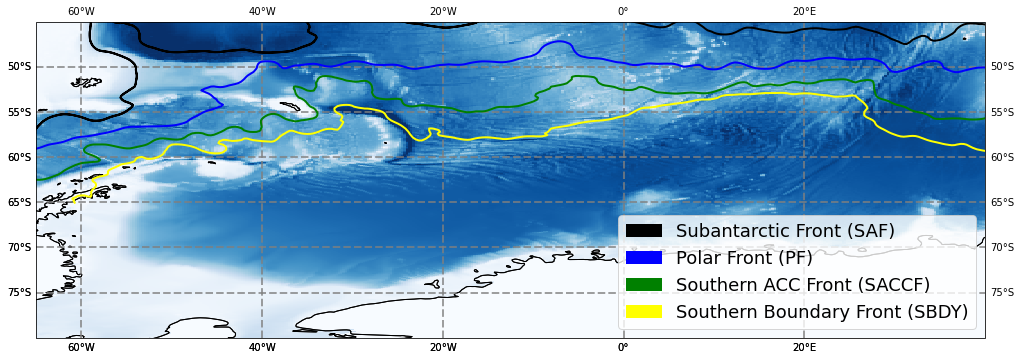

In [7]:
vmin = -6000.0
vmax = 0.0

# cartopy plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]],
                ccrs.PlateCarree())
# colormesh histogram
CS = plt.pcolormesh(bathy_lon, bathy_lat, bathy, transform=ccrs.PlateCarree(), cmap="Blues_r")
plt.clim(vmin, vmax)
ax.coastlines(resolution='50m',color='white')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)
ax.coastlines(resolution='50m')

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['Subantarctic Front (SAF)', 'Polar Front (PF)', 'Southern ACC Front (SACCF)', 'Southern Boundary Front (SBDY)']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True, fontsize=18)

if saveFig==True:
    plt.savefig(ploc + 'bathymetry_withFronts.png', bbox_inches='tight')
    plt.savefig(ploc + 'bathymetry_withFronts.pdf', bbox_inches='tight')
    
plt.show()
plt.close()